# CIV1499 - Introduction to Data Science
## Project - Toronto Bike Share

## Setup Notebook

In [1]:
# Import 3rd party libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import difflib

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# 1. Weather Data

In [2]:
weather_filenames = [filename for filename in os.listdir() if 'climate' in filename]
print(weather_filenames[0:5])

['en_climate_hourly_ON_6158359_01-2017_P1H.csv', 'en_climate_hourly_ON_6158359_01-2018_P1H.csv', 'en_climate_hourly_ON_6158359_01-2019_P1H.csv', 'en_climate_hourly_ON_6158359_01-2020_P1H.csv', 'en_climate_hourly_ON_6158359_02-2017_P1H.csv']


In [3]:
# create a single dataframe by concatenating data files
weather_df = pd.concat([pd.read_csv(fn) for fn in weather_filenames])

# View DataFrame
weather_df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 00:00,2017,1,1,00:00,1.5,...,NaN,16.1,NaN,99.81,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 01:00,2017,1,1,01:00,1.5,...,NaN,16.1,NaN,100.01,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 02:00,2017,1,1,02:00,1.0,...,NaN,16.1,NaN,100.14,NaN,NaN,NaN,NaN,NaN,NaN
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 03:00,2017,1,1,03:00,1.2,...,NaN,16.1,NaN,100.32,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 04:00,2017,1,1,04:00,1.3,...,NaN,16.1,NaN,100.48,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Create Date/Time index using Date/Time Column
weather_df = weather_df.set_index(pd.DatetimeIndex(weather_df["Date/Time"]))
weather_df = weather_df.drop("Date/Time", axis=1)

# Localize timezone to "EST"
weather_df = weather_df.set_index(pd.DatetimeIndex(weather_df.index, tz="UTC").tz_convert("EST"))

# View DataFrame
weather_df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2016-12-31 19:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,00:00,1.5,NaN,...,NaN,16.1,NaN,99.81,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 20:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,01:00,1.5,NaN,...,NaN,16.1,NaN,100.01,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 21:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,02:00,1.0,NaN,...,NaN,16.1,NaN,100.14,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 22:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,03:00,1.2,NaN,...,NaN,16.1,NaN,100.32,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 23:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,04:00,1.3,NaN,...,NaN,16.1,NaN,100.48,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Write your code here.
weather_data_missing = weather_df.isnull().sum().to_frame(name="count")

# View DataFrame
weather_data_missing

,count
Longitude (x),0
Latitude (y),0
Station Name,0
Climate ID,0
Year,0
Month,0
Day,0
Time,0
Temp (°C),459
Temp Flag,34975


# 2. Bike Share Trip Data

In [6]:
# Create a list of file names for bike share trips data
trips_filenames = [filename for filename in os.listdir() if 'bike_share' in filename]

# Create a dictionary where key:value pairs correspond to 
# the file name and DataFrame respectively
trips_data = {filename: pd.read_csv(filename) for filename in trips_filenames}

# Now lets print out the column names for the first month of each year
print('2017\n{}\n'.format(trips_data['bike_share_2017-1.csv'].columns.tolist()))
print('2018\n{}\n'.format(trips_data['bike_share_2018-1.csv'].columns.tolist()))
print('2019\n{}\n'.format(trips_data['bike_share_2019-1.csv'].columns.tolist()))
print('2020\n{}\n'.format(trips_data['bike_share_2020-1.csv'].columns.tolist()))

2017
['trip_id', 'trip_start_time', 'trip_stop_time', 'trip_duration_seconds', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'user_type']

2018
['trip_id', 'trip_duration_seconds', 'from_station_id', 'trip_start_time', 'from_station_name', 'trip_stop_time', 'to_station_id', 'to_station_name', 'user_type']

2019
['Trip Id', 'Subscription Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']

2020
['Trip Id', 'Subscription Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']



In [7]:
# Process data in new file format (2019-2020)
# "Trip  Duration" column contains double spaces, which is not consistent with other columns.
# Thus, the double-space will be replaced by single-space

trips_data = pd.concat([pd.read_csv(fn) for fn in trips_filenames if ('2019' in fn or '2020' in fn)])

# Let's remove double spaces from the column names
trips_data.columns = [' '.join(col.split()) for col in trips_data.columns]

# View DataFrame
print(trips_data.head())

   Trip Id  Subscription Id  Trip Duration  Start Station Id  \
0  4581278           199751           1547              7021   
1  4581279           294730           1112              7160   
2  4581280           197252            589              7055   
3  4581281           171700            259              7012   
4  4581282           306314            281              7041   

                  Start Time                       Start Station Name  \
0  01/01/2019 00:08:00 (EST)                       Bay St / Albert St   
1  01/01/2019 00:10:00 (EST)                 King St W / Tecumseth St   
2  01/01/2019 00:15:00 (EST)                   Jarvis St / Carlton St   
3  01/01/2019 00:16:00 (EST)  Elizabeth St / Edward St (Bus Terminal)   
4  01/01/2019 00:19:00 (EST)                     Edward St / Yonge St   

   End Station Id                   End Time  \
0          7233.0  01/01/2019 00:33:00 (EST)   
1          7051.0  01/01/2019 00:29:00 (EST)   
2          7013.0  01/01/2019 00

In [8]:
# process data in old file format (up to 2018)
trips_data_old = pd.concat([pd.read_csv(fn) for fn in trips_filenames if not ('2019' in fn or '2020' in fn)])

name_map = {"trip_id":"Trip Id", "trip_duration_seconds":"Trip Duration",
            "from_station_id":"Start Station Id", "trip_start_time":"Start Time",
           "from_station_name":"Start Station Name", "to_station_id":"End Station Id",
           "trip_stop_time":"End Time", "to_station_name":"End Station Name",
           "user_type":"User Type"}


trips_data_old = trips_data_old.rename(columns=name_map)

# concatenate old and new trip dataframe
trips_df = pd.concat([trips_data_old, trips_data])
print("# of rows:", len(trips_df))

# Remove trips_data_old and trips_data objects to save memory
del trips_data_old, trips_data

# of rows: 8467545


In [9]:
# View DataFrame
trips_df.head()

,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type,Subscription Id,Bike Id
0,712441,2017-01-01 05:03 (UTC),2017-01-01 05:08 (UTC),274,7006.0,Bay St / College St (East Side),7021.0,Bay St / Albert St,Member,NaN,NaN
1,712442,2017-01-01 05:03 (UTC),2017-01-01 05:12 (UTC),538,7046.0,Niagara St / Richmond St W,7147.0,King St W / Fraser Ave,Member,NaN,NaN
2,712443,2017-01-01 05:05 (UTC),2017-01-01 05:22 (UTC),992,7048.0,Front St / Yonge St (Hockey Hall of Fame),7089.0,Church St / Wood St,Member,NaN,NaN
3,712444,2017-01-01 05:09 (UTC),2017-01-01 05:26 (UTC),1005,7177.0,East Liberty St / Pirandello St,7202.0,Queen St W / York St (City Hall),Member,NaN,NaN
4,712445,2017-01-01 05:14 (UTC),2017-01-01 05:25 (UTC),645,7203.0,Bathurst St / Queens Quay W,7010.0,King St W / Spadina Ave,Member,NaN,NaN


In [10]:
# Remove duplicate trips
trips_df = trips_df.drop_duplicates(["Trip Id"])
print("# of rows:", len(trips_df))

# of rows: 8467545


In [11]:
# Check for missing trip values
trips_data_missing = trips_df.isnull().sum().to_frame(name="count")

# View DataFrame
trips_data_missing

,count
Trip Id,0
Start Time,0
End Time,1
Trip Duration,0
Start Station Id,1026893
Start Station Name,164
End Station Id,1028159
End Station Name,1409
User Type,0
Subscription Id,3415324


In [12]:
# count trips with unknown starting / ending location
print("# of trips with unknown starting location:", len(trips_df[
    (trips_df["Start Station Name"].isnull()) & (trips_df["Start Station Id"].isnull())]))

print("# of trips with unknown ending location:", len(trips_df[
    (trips_df["End Station Name"].isnull()) & (trips_df["End Station Id"].isnull())]))

# of trips with unknown starting location: 0
# of trips with unknown ending location: 1267


In [13]:
# drop trips with unknown ending location
trips_df = trips_df[(~trips_df["End Station Name"].isnull()) | (~trips_df["End Station Id"].isnull())]
print("# of rows:", len(trips_df))

# of rows: 8466278


In [14]:
# remove false trips
trips_df = trips_df[trips_df['Trip Duration'] >= 60]
print("# of rows:", len(trips_df))

# of rows: 8415596


In [15]:
# Remove outliners
Q1 = trips_df['Trip Duration'].quantile(0.25)
Q3 = trips_df['Trip Duration'].quantile(0.75)
IQR = Q3 - Q1

trips_df = trips_df[(trips_df['Trip Duration'] >= (Q1 - 1.5 * IQR)) &
                       (trips_df['Trip Duration'] <= (Q3 + 1.5 * IQR))]

# View DataFrame
print("# of rows:", len(trips_df))
print("Q1, Q3 values:", Q1, Q3)

# of rows: 8040195
Q1, Q3 values: 445.0 1140.0


In [16]:
# Check for missing trip values again
trips_data_missing = trips_df.isnull().sum().to_frame(name="count")

# View DataFrame
trips_data_missing

,count
Trip Id,0
Start Time,0
End Time,0
Trip Duration,0
Start Station Id,944733
Start Station Name,156
End Station Id,944733
End Station Name,133
User Type,0
Subscription Id,3232427


Text(0, 0.5, 'Probability Density')

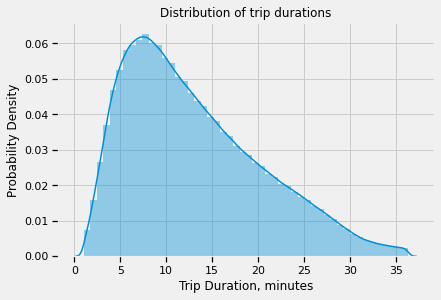

In [17]:
# Visualize trip duration distribution
ax = sns.distplot(trips_df['Trip Duration'] / 60)
ax.set_title("Distribution of trip durations")
ax.set_xlabel("Trip Duration, minutes")
ax.set_ylabel("Probability Density")

In [18]:
# Extract Time Zones from Start Time, check if all file
trips_df["Time Zone (Start Time)"] = trips_df["Start Time"].str.extract(r"\(([A-Z]+)\)")
trips_df["Time Zone (End Time)"] = trips_df["End Time"].str.extract(r"\(([A-Z]+)\)")

trips_df["Start Time"] = trips_df["Start Time"].str.replace(pat="\s\([A-Z]+\)", repl="", regex=True)
trips_df["End Time"] = trips_df["End Time"].str.replace(pat="\s\([A-Z]+\)", repl="", regex=True)

print("Unique Time Zones:", trips_df["Time Zone (Start Time)"].unique())

print("Time Zone (End) == Time Zone (Start):", 
      trips_df["Time Zone (Start Time)"].equals(trips_df["Time Zone (End Time)"]))

Unique Time Zones: ['UTC' 'EST']
Time Zone (End) == Time Zone (Start): True


In [19]:
# localize 'Start Time' based on recorded time zone and convert to Eastern Standard Time (EST)

trips_df.loc[trips_df["Time Zone (Start Time)"] == "EST", "Start Time"] = \
pd.DatetimeIndex(pd.to_datetime(trips_df[trips_df["Time Zone (Start Time)"] == "EST"]["Start Time"], 
               infer_datetime_format=True)).tz_localize("EST")
trips_df.loc[trips_df["Time Zone (Start Time)"] == "UTC", "Start Time"] = \
pd.DatetimeIndex(pd.to_datetime(trips_df[trips_df["Time Zone (Start Time)"] == "UTC"]["Start Time"], 
               infer_datetime_format=True)).tz_localize("UTC").tz_convert("EST")

# Set the dtype of the column
trips_df["Start Time"] = pd.DatetimeIndex(trips_df["Start Time"], tz="EST")

# Drop Time Zone (Start Time) column to save memory
trips_df = trips_df.drop(columns=["Time Zone (Start Time)"])

In [20]:
# localize 'End Time' based on recorded time zone and convert to Eastern Standard Time (EST)
trips_df.loc[trips_df["Time Zone (End Time)"] == "EST", "End Time"] = \
pd.DatetimeIndex(pd.to_datetime(trips_df[trips_df["Time Zone (End Time)"] == "EST"]["End Time"], 
               infer_datetime_format=True)).tz_localize("EST")
trips_df.loc[trips_df["Time Zone (End Time)"] == "UTC", "End Time"] = \
pd.DatetimeIndex(pd.to_datetime(trips_df[trips_df["Time Zone (End Time)"] == "UTC"]["End Time"], 
               infer_datetime_format=True)).tz_localize("UTC").tz_convert("EST")

# Set the dtype of the column
trips_df["End Time"] = pd.DatetimeIndex(trips_df["End Time"], tz="EST")

# Drop Time Zone (End Time) column to save memory
trips_df = trips_df.drop(columns=["Time Zone (End Time)"])

In [21]:
trips_df.to_pickle("./trips_df.pkl")

# 3. Station Data

In [22]:
stations = pd.read_csv('bikeshare_stations.csv')
stations.head()

,Station Id,Station Name,lat,lon,capacity
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,35
1,7001,Lower Jarvis St / The Esplanade,43.647830,-79.370698,15
2,7002,St. George St / Bloor St W,43.667333,-79.399429,19
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761,15
4,7004,University Ave / Elm St,43.656518,-79.389099,11


In [23]:
# Check for missing trip values again
stations_data_missing = stations.isnull().sum().to_frame(name="count")

# View DataFrame
stations_data_missing

,count
Station Id,0
Station Name,0
lat,0
lon,0
capacity,0


In [24]:
# Simplify street names
def simplify_street_names(s):
    replace_d = {"SMART": "", "-": "", "  ": " ", "Beverly": "Beverley", "(Green P)": "", "Queens":"Queen's",
                "Subway Green P": "Subway", "Subway Station": "Subway", "(Ontario Place)": "", "Lakeshore": "Lake Shore",
                "Crt": "Ct", "(Cedarvale Ave)": "", "Berkely" : "Berkeley"}

    replace_d = {key.upper() : replace_d[key].upper() for key in replace_d}

    s = s.str.upper()
    for key in replace_d:
        s = s.str.replace(key, replace_d[key])
    s = s.str.strip()
    
    return s
    
stations["Station Name"] = simplify_street_names(stations["Station Name"])

In [25]:
trips_df = pd.read_pickle("./trips_df.pkl")
print(len(trips_df))

8040195


In [26]:
# Check for missing trip values again
trips_data_missing = trips_df.isnull().sum().to_frame(name="count")

# View DataFrame
trips_data_missing

,count
Trip Id,0
Start Time,0
End Time,0
Trip Duration,0
Start Station Id,944733
Start Station Name,156
End Station Id,944733
End Station Name,133
User Type,0
Subscription Id,3232427


In [27]:
# Simplify street names
trips_df["Start Station Name"] = simplify_street_names(trips_df["Start Station Name"])
trips_df["End Station Name"] = simplify_street_names(trips_df["End Station Name"])

In [28]:
data_merged = trips_df.merge(stations[["Station Id", "Station Name"]], how="left", left_on=["Start Station Id"], right_on=["Station Id"])

# For stations with matching station ID, copy names from stations.csv
data_merged.loc[~data_merged["Station Name"].isnull(), "Start Station Name"] = \
data_merged[~data_merged["Station Name"].isnull()]["Station Name"]

not_matched = data_merged[data_merged["Station Name"].isnull()]["Start Station Name"].unique()
fuzzy_match = np.array([difflib.get_close_matches(x, stations["Station Name"], n=3, cutoff=0.6) for x in not_matched])
score = np.array([difflib.SequenceMatcher(None, x[0], x[1][0]).ratio() if len(x[1]) > 0 else 0 for x in zip(not_matched, fuzzy_match)])

list(zip(not_matched, fuzzy_match, score))

[('QUEEN ST W / JAMES ST',
  ['QUEEN ST W / JAMES ST',
   'QUEEN ST W / JOHN ST',
   'QUEEN ST W / PORTLAND ST'],
  1.0),
 ('HAYTER ST / LAPLANTE AVE',
  ['HAYTER ST / LAPLANTE AVE',
   'ANTLER ST / CAMPBELL AVE',
   'YONGE ST / AYLMER AVE'],
  1.0),
 ('BEVERLEY ST / COLLEGE ST',
  ['BEVERLEY ST / COLLEGE ST',
   'BEVERLEY ST / DUNDAS ST W',
   'BAY ST / SCOLLARD ST'],
  1.0),
 ('THOMPSON ST / BROADVIEW AVE',
  ['THOMPSON ST / BROADVIEW AVE',
   'ROEHAMPTON ST / BAYVIEW AVE',
   'TORRENS AVE / BROADVIEW AVE'],
  1.0),
 ('DUNDONALD ST / CHURCH ST',
  ['DUNDONALD ST / CHURCH ST',
   'ISABELLA ST / CHURCH ST',
   'MCGILL ST / CHURCH ST'],
  1.0),
 ('WIDMER ST / ADELAIDE ST W',
  ['WIDMER ST / ADELAIDE ST W',
   'SIMCOE ST / ADELAIDE ST W',
   'BERKELEY ST / ADELAIDE ST E'],
  1.0),
 ('STEWART ST / BATHURST ST',
  ['STEWART ST / BATHURST ST',
   'ULSTER ST / BATHURST ST',
   'FLEET ST / BATHURST ST'],
  1.0),
 ('BALDWIN AVE / SPADINA AVE',
  ['BALDWIN AVE / SPADINA AVE',
   'LOGAN AVE / BA

In [29]:
# Merge with stations dataframe using Start Station Id
data_merged = trips_df.merge(stations[["Station Id", "Station Name"]], how="left", left_on=["Start Station Id"], right_on=["Station Id"])

# For stations with matching station ID, copy names from stations.csv
data_merged.loc[~data_merged["Station Name"].isnull(), "Start Station Name"] = \
data_merged[~data_merged["Station Name"].isnull()]["Station Name"]
data_merged = data_merged.drop(columns=["Station Id", "Station Name"])

# Then join by station names
data_merged = data_merged.merge(stations, how="left", left_on=["Start Station Name"], right_on=["Station Name"])

# Copy station ID from stations.csv if station names matched
data_merged.loc[~data_merged["Station Name"].isnull(), "Start Station Id"] = \
data_merged[~data_merged["Station Name"].isnull()]["Station Id"]
data_merged = data_merged.drop(columns=["Station Id", "Station Name"])

data_merged.head()

,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type,Subscription Id,Bike Id,lat,lon,capacity
0,712441,2017-01-01 00:03:00-05:00,2017-01-01 00:08:00-05:00,274,7006.0,BAY ST / COLLEGE ST (EAST SIDE),7021.0,BAY ST / ALBERT ST,Member,NaN,NaN,43.660439,-79.385525,11.0
1,712442,2017-01-01 00:03:00-05:00,2017-01-01 00:12:00-05:00,538,7046.0,NIAGARA ST / RICHMOND ST W,7147.0,KING ST W / FRASER AVE,Member,NaN,NaN,43.645340,-79.409597,26.0
2,712443,2017-01-01 00:05:00-05:00,2017-01-01 00:22:00-05:00,992,7048.0,FRONT ST W / YONGE ST (HOCKEY HALL OF FAME),7089.0,CHURCH ST / WOOD ST,Member,NaN,NaN,43.646144,-79.377962,47.0
3,712444,2017-01-01 00:09:00-05:00,2017-01-01 00:26:00-05:00,1005,7177.0,EAST LIBERTY ST / PIRANDELLO ST,7202.0,QUEEN ST W / YORK ST (CITY HALL),Member,NaN,NaN,43.638611,-79.414722,19.0
4,712445,2017-01-01 00:14:00-05:00,2017-01-01 00:25:00-05:00,645,7203.0,BATHURST ST/QUEEN'S QUAY(BILLY BISHOP AIRPORT),7010.0,KING ST W / SPADINA AVE,Member,NaN,NaN,43.635492,-79.398253,35.0


In [30]:
# Repeat for End Stations

# Merge with stations dataframe using End Station Id
data_merged = data_merged.merge(stations[["Station Id", "Station Name"]], how="left", left_on=["End Station Id"], right_on=["Station Id"])

# For stations with matching station ID, copy names from stations.csv
data_merged.loc[~data_merged["Station Name"].isnull(), "End Station Name"] = \
data_merged[~data_merged["Station Name"].isnull()]["Station Name"]
data_merged = data_merged.drop(columns=["Station Id", "Station Name"])

# Then join by station names
data_merged = data_merged.merge(stations, how="left", left_on=["End Station Name"], right_on=["Station Name"])

# Copy station ID from stations.csv if station names matched
data_merged.loc[~data_merged["Station Name"].isnull(), "End Station Id"] = \
data_merged[~data_merged["Station Name"].isnull()]["Station Id"]
data_merged = data_merged.drop(columns=["Station Id", "Station Name"])
data_merged = data_merged.rename(columns={"lat_x": "Start Lat", "lon_x": "Start Lon", "capacity_x": "Start Capacity",
                           "lat_y": "End Lat", "lon_y": "End Lon", "capacity_y": "End Capacity"})
data_merged.head()


,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type,Subscription Id,Bike Id,Start Lat,Start Lon,Start Capacity,End Lat,End Lon,End Capacity
0,712441,2017-01-01 00:03:00-05:00,2017-01-01 00:08:00-05:00,274,7006.0,BAY ST / COLLEGE ST (EAST SIDE),7021.0,BAY ST / ALBERT ST,Member,NaN,NaN,43.660439,-79.385525,11.0,43.653264,-79.382458,35.0
1,712442,2017-01-01 00:03:00-05:00,2017-01-01 00:12:00-05:00,538,7046.0,NIAGARA ST / RICHMOND ST W,7147.0,KING ST W / FRASER AVE,Member,NaN,NaN,43.645340,-79.409597,26.0,43.639444,-79.425278,15.0
2,712443,2017-01-01 00:05:00-05:00,2017-01-01 00:22:00-05:00,992,7048.0,FRONT ST W / YONGE ST (HOCKEY HALL OF FAME),7089.0,CHURCH ST / WOOD ST,Member,NaN,NaN,43.646144,-79.377962,47.0,43.662712,-79.379903,19.0
3,712444,2017-01-01 00:09:00-05:00,2017-01-01 00:26:00-05:00,1005,7177.0,EAST LIBERTY ST / PIRANDELLO ST,7202.0,QUEEN ST W / YORK ST (CITY HALL),Member,NaN,NaN,43.638611,-79.414722,19.0,43.651667,-79.384167,31.0
4,712445,2017-01-01 00:14:00-05:00,2017-01-01 00:25:00-05:00,645,7203.0,BATHURST ST/QUEEN'S QUAY(BILLY BISHOP AIRPORT),7010.0,KING ST W / SPADINA AVE,Member,NaN,NaN,43.635492,-79.398253,35.0,43.645323,-79.395003,19.0


In [31]:
# Check for missing trip values again
trips_data_missing = data_merged.isnull().sum().to_frame(name="count")

# View DataFrame
trips_data_missing

,count
Trip Id,0
Start Time,0
End Time,0
Trip Duration,0
Start Station Id,112952
Start Station Name,0
End Station Id,116589
End Station Name,0
User Type,0
Subscription Id,3236976


In [32]:
# drop data with unknown locations (since it is small portion now)
data_merged = data_merged[~data_merged["Start Lat"].isnull()]
data_merged = data_merged[~data_merged["End Lat"].isnull()]
data_merged = data_merged.astype({'Start Station Id': 'int64', 'End Station Id': 'int64'})

In [33]:
# Check for missing trip values again
trips_data_missing = data_merged.isnull().sum().to_frame(name="count")

# View DataFrame
trips_data_missing

,count
Trip Id,0
Start Time,0
End Time,0
Trip Duration,0
Start Station Id,0
Start Station Name,0
End Station Id,0
End Station Name,0
User Type,0
Subscription Id,3021305


In [34]:
# Merge with Weather Dataframe
data_merged["merge_time"] = data_merged["Start Time"].dt.floor('H')
data_merged = data_merged.merge(weather_df, right_index=True, left_on=["merge_time"])

# View DataFrame
data_merged.head()

,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type,Subscription Id,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,712441,2017-01-01 00:03:00-05:00,2017-01-01 00:08:00-05:00,274,7006,BAY ST / COLLEGE ST (EAST SIDE),7021,BAY ST / ALBERT ST,Member,NaN,...,NaN,16.1,NaN,100.55,NaN,NaN,NaN,NaN,NaN,NaN
1,712442,2017-01-01 00:03:00-05:00,2017-01-01 00:12:00-05:00,538,7046,NIAGARA ST / RICHMOND ST W,7147,KING ST W / FRASER AVE,Member,NaN,...,NaN,16.1,NaN,100.55,NaN,NaN,NaN,NaN,NaN,NaN
2,712443,2017-01-01 00:05:00-05:00,2017-01-01 00:22:00-05:00,992,7048,FRONT ST W / YONGE ST (HOCKEY HALL OF FAME),7089,CHURCH ST / WOOD ST,Member,NaN,...,NaN,16.1,NaN,100.55,NaN,NaN,NaN,NaN,NaN,NaN
3,712444,2017-01-01 00:09:00-05:00,2017-01-01 00:26:00-05:00,1005,7177,EAST LIBERTY ST / PIRANDELLO ST,7202,QUEEN ST W / YORK ST (CITY HALL),Member,NaN,...,NaN,16.1,NaN,100.55,NaN,NaN,NaN,NaN,NaN,NaN
4,712445,2017-01-01 00:14:00-05:00,2017-01-01 00:25:00-05:00,645,7203,BATHURST ST/QUEEN'S QUAY(BILLY BISHOP AIRPORT),7010,KING ST W / SPADINA AVE,Member,NaN,...,NaN,16.1,NaN,100.55,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7844574 entries, 0 to 8060898
Data columns (total 45 columns):
 #   Column               Dtype              
---  ------               -----              
 0   Trip Id              int64              
 1   Start Time           datetime64[ns, EST]
 2   End Time             datetime64[ns, EST]
 3   Trip Duration        int64              
 4   Start Station Id     int64              
 5   Start Station Name   object             
 6   End Station Id       int64              
 7   End Station Name     object             
 8   User Type            object             
 9   Subscription Id      float64            
 10  Bike Id              float64            
 11  Start Lat            float64            
 12  Start Lon            float64            
 13  Start Capacity       float64            
 14  End Lat              float64            
 15  End Lon              float64            
 16  End Capacity         float64            
 17  merge_ti

In [36]:
data_merged.to_pickle("./merged_df.pkl")